# Sample with lakes

In [1]:
%matplotlib inline
import os, sys
import logging

import numpy as np
from scipy.ndimage import imread
from matplotlib import pyplot as plt

from morphsnakes.morphsnakes import MorphGAC, MorphACWE, gborders
import morphsnakes.multi_snakes as multi_ms
from tests.tests import rgb2gray, circle_levelset

PATH_IMG_LAKES = os.path.abspath(os.path.join('images', 'lakes3.jpg')) 

## Single snake

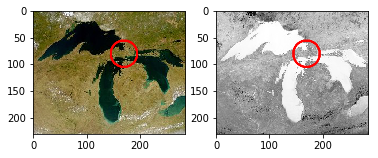

In [2]:
# Load the image.
img_color = imread(PATH_IMG_LAKES) / 255.0
img = rgb2gray(img_color)
levelset = circle_levelset(img.shape, (80, 170), 25)

_= plt.subplot(1, 2, 1), plt.imshow(img_color), plt.contour(levelset, colors='r') 
_= plt.subplot(1, 2, 2), plt.imshow(img, cmap=plt.cm.Greys), plt.contour(levelset, colors='r')

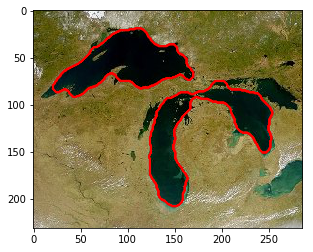

In [4]:
# Morphological ACWE. Initialization of the level-set.
macwe = MorphACWE(levelset, img, smoothing=3, lambda1=1, lambda2=1)
macwe.run(250)

_= plt.imshow(img_color), plt.contour(macwe.levelset, colors='r')

## Multiple snakes

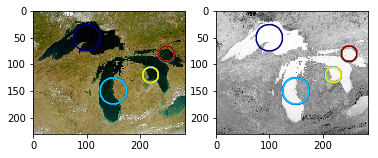

In [5]:
logging.info('running: test_multi_lakes...')
# Load the image.
img_color = imread(PATH_IMG_LAKES) / 255.0
img = rgb2gray(img_color)

# Morphological ACWE. Initialization of the level-set.
mask = np.zeros(img.shape, dtype=int)
mask[circle_levelset(img.shape, (50, 100), 25) == 1] = 1
mask[circle_levelset(img.shape, (150, 150), 25) == 1] = 2
mask[circle_levelset(img.shape, (120, 220), 15) == 1] = 3
mask[circle_levelset(img.shape, (80, 250), 15) == 1] = 4

_= plt.subplot(1, 2, 1), plt.imshow(img_color), plt.contour(mask, cmap=plt.cm.jet) 
_= plt.subplot(1, 2, 2), plt.imshow(img, cmap=plt.cm.Greys), plt.contour(mask, cmap=plt.cm.jet)

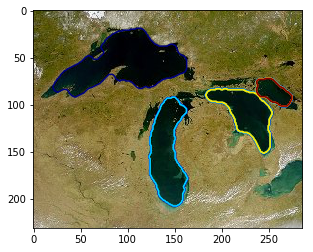

In [6]:
# MorphACWE does not need g(I)
ms = multi_ms.MultiMorphSnakes(img, mask, MorphACWE, 
                               dict(smoothing=3, lambda1=1, lambda2=1))
ms.run(250)

_= plt.imshow(img_color), plt.contour(ms.levelset, cmap=plt.cm.jet)